<a href="https://colab.research.google.com/github/Yannethtj/PruebasSaberProInteligenciaArtificial/blob/main/02_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!kaggle
!chmod 600 ./kaggle.json

usage: kaggle [-h] [-v] [-W] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...
kaggle: error: the following arguments are required: command


In [ ]:
!kaggle competitions download -c udea-ai4eng-20242

udea-ai4eng-20242.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip udea-ai4eng-20242.zip


Archive:  udea-ai4eng-20242.zip
replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: submission_example.csv  
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: train.csv               


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Grid creation
import seaborn as sns


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head().T

,0,1,2,3,4
ID,904256,645256,308367,470353,989032
PERIODO,20212,20212,20203,20195,20212
ESTU_PRGM_ACADEMICO,ENFERMERIA,DERECHO,MERCADEO Y PUBLICIDAD,ADMINISTRACION DE EMPRESAS,PSICOLOGIA
ESTU_PRGM_DEPARTAMENTO,BOGOTÁ,ATLANTICO,BOGOTÁ,SANTANDER,ANTIOQUIA
ESTU_VALORMATRICULAUNIVERSIDAD,Entre 5.5 millones y menos de 7 millones,Entre 2.5 millones y menos de 4 millones,Entre 2.5 millones y menos de 4 millones,Entre 4 millones y menos de 5.5 millones,Entre 2.5 millones y menos de 4 millones
ESTU_HORASSEMANATRABAJA,Menos de 10 horas,0,Más de 30 horas,0,Entre 21 y 30 horas
FAMI_ESTRATOVIVIENDA,Estrato 3,Estrato 3,Estrato 3,Estrato 4,Estrato 3
FAMI_TIENEINTERNET,Si,No,Si,Si,Si
FAMI_EDUCACIONPADRE,Técnica o tecnológica incompleta,Técnica o tecnológica completa,Secundaria (Bachillerato) completa,No sabe,Primaria completa
FAMI_EDUCACIONMADRE,Postgrado,Técnica o tecnológica incompleta,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Primaria completa


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: int64(2), object(10)
memory

In [ ]:
train.isna().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664


# Hasta el momento cargamos el archivo Train, visualizamos las columnas con las que vamos a trabajar y tambien vemos que columnas tienen datos faltantes.

In [ ]:
ccols = [i for i in train.columns if not i in train._get_numeric_data()]
print (ccols)

['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO', 'RENDIMIENTO_GLOBAL']


In [ ]:
for c in ccols:
    print ("%10s"%c, np.unique(train[c].dropna()))

ESTU_PRGM_ACADEMICO ['3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES'
 'ACTIVIDAD FISICA Y DEPORTE' 'ACUICULTURA' 'ADMINISTRACION'
 'ADMINISTRACION  FINANCIERA' 'ADMINISTRACION & SERVICIO'
 'ADMINISTRACION AERONAUTICA' 'ADMINISTRACION AGROPECUARIA'
 'ADMINISTRACION AMBIENTAL'
 'ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES'
 'ADMINISTRACION BANCARIA Y FINANCIERA' 'ADMINISTRACION COMERCIAL'
 'ADMINISTRACION COMERCIAL Y DE MERCADEO'
 'ADMINISTRACION DE COMERCIO EXTERIOR' 'ADMINISTRACION DE EMPRESAS'
 'ADMINISTRACION DE EMPRESAS  Y  GESTION AMBIENTAL'
 'ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES'
 'ADMINISTRACION DE EMPRESAS AGROPECUARIAS'
 'ADMINISTRACION DE EMPRESAS COMERCIALES'
 'ADMINISTRACION DE EMPRESAS EN TELECOMUNICACIONES'
 'ADMINISTRACION DE EMPRESAS TURISTICA'
 'ADMINISTRACION DE EMPRESAS TURISTICAS'
 'ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS'
 'ADMINISTRACION DE EMPRESAS TURÍSTICAS Y HOTELERAS'
 'ADMINISTRACION DE EMPRESAS Y FINANZAS'
 'ADMINISTRACION DE GESTI

In [ ]:
#ver la cantidad de valores distintos que hay en mis columnas de tipo object
for col in train.select_dtypes(include=['object']).columns:
  print(f'{col}: {train[col].nunique()} unique values')


ESTU_PRGM_ACADEMICO: 948 unique values
ESTU_PRGM_DEPARTAMENTO: 31 unique values
ESTU_VALORMATRICULAUNIVERSIDAD: 8 unique values
ESTU_HORASSEMANATRABAJA: 5 unique values
FAMI_ESTRATOVIVIENDA: 7 unique values
FAMI_TIENEINTERNET: 2 unique values
FAMI_EDUCACIONPADRE: 12 unique values
FAMI_EDUCACIONMADRE: 12 unique values
ESTU_PAGOMATRICULAPROPIO: 2 unique values
RENDIMIENTO_GLOBAL: 4 unique values


In [ ]:
train.describe(include='object')

,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
count,692500,692500,686213,661643,660363,665871,669322,668836,686002,692500
unique,948,31,8,5,7,2,12,12,2,4
top,DERECHO,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,alto
freq,53244,282159,204048,249352,232671,592514,128289,141744,382201,175619


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: int64(2), object(10)
memory

In [ ]:
train['PERIODO'].unique()

array([20212, 20203, 20195, 20183, 20194, 20213, 20184, 20202, 20196])

Variables binarias
Inspeccionamos cómo estan distribuidas las variables binarias de nuestro dataset.

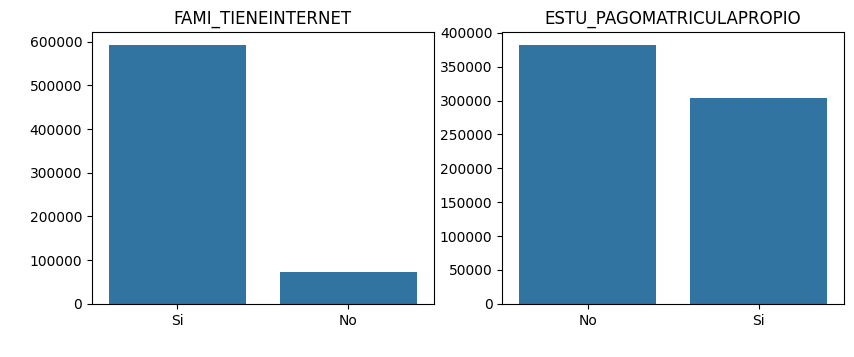

In [ ]:
# Get binary variables
unique_values_count = train.nunique()
bin_cols = [cname for cname in unique_values_count.index if unique_values_count[cname] <= 2]

# Show distribution for each binary variable
plt.figure(figsize=(15, 12))
grid = gridspec.GridSpec(3, 3) # Create a grid for subplots

for idx, col in enumerate(bin_cols):
    ax = plt.subplot(grid[idx])
    sns.countplot(x=col, data=train)
    ax.set_xlabel(" ") # Delete xlabel
    ax.set_ylabel(" ")
    ax.set_title(f"{col}")

plt.show()

Variables categoricas que tienen cierto orden logico
<br/>
que en este caso son las siguientes.
ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA         


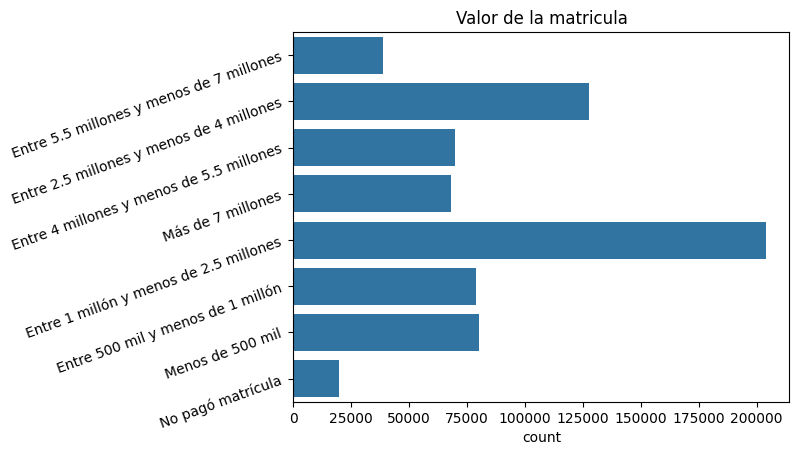

In [ ]:
sns.countplot(data=train, y="ESTU_VALORMATRICULAUNIVERSIDAD")
plt.title("Valor de la matricula")
plt.ylabel("")
plt.yticks(rotation=20)
plt.show()

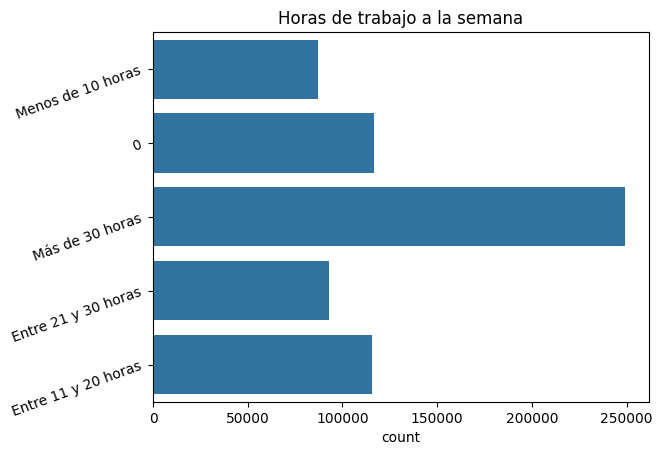

In [ ]:
sns.countplot(data=train, y="ESTU_HORASSEMANATRABAJA")
plt.title("Horas de trabajo a la semana")
plt.ylabel("")
plt.yticks(rotation=20)
plt.show()

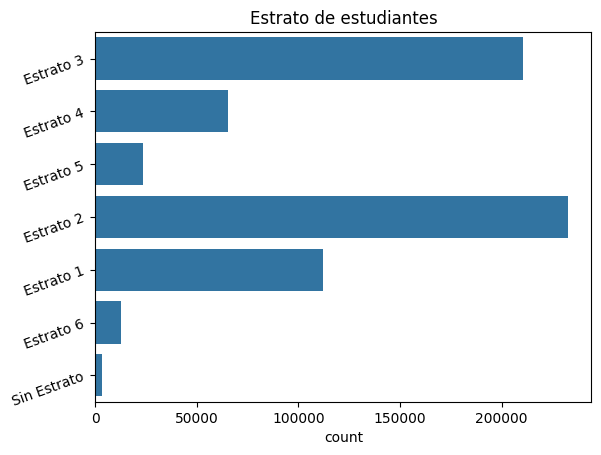

In [ ]:
sns.countplot(data=train, y="FAMI_ESTRATOVIVIENDA")
plt.title("Estrato de estudiantes")
plt.ylabel("")
plt.yticks(rotation=20)
plt.show()

Visualización de las columnas con muchos posibles resultados como son
<br/>
ESTU_PRGM_ACADEMICO, ESTU_PRGM_DEPARTAMENTO

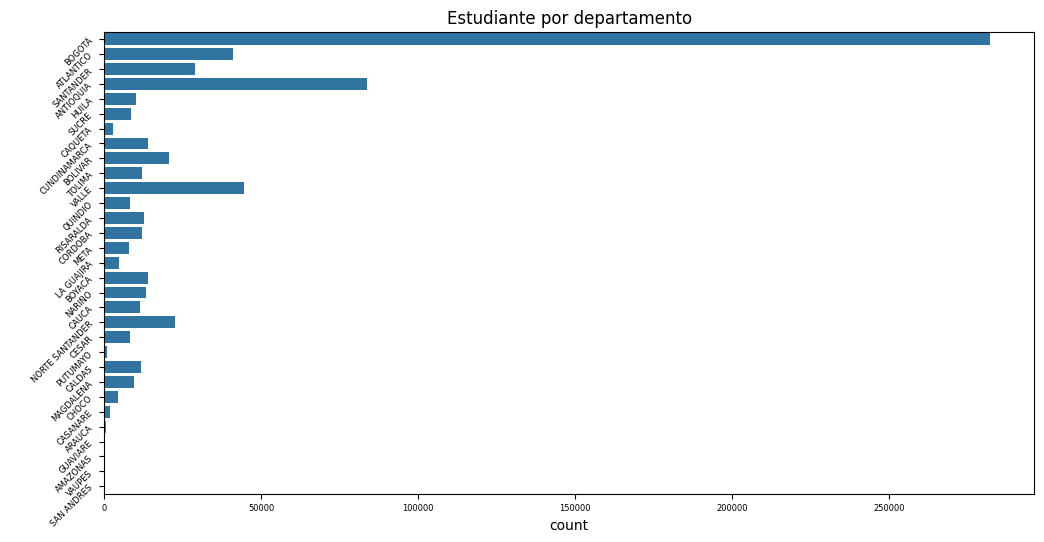

In [ ]:

plt.figure(figsize=(12, 6))
ay = sns.countplot(data=train, y="ESTU_PRGM_DEPARTAMENTO")
ay.set_title("Estudiante por departamento")
ay.set_ylabel(" ")
plt.yticks(rotation=45)
plt.tick_params(labelsize=6)
plt.show()

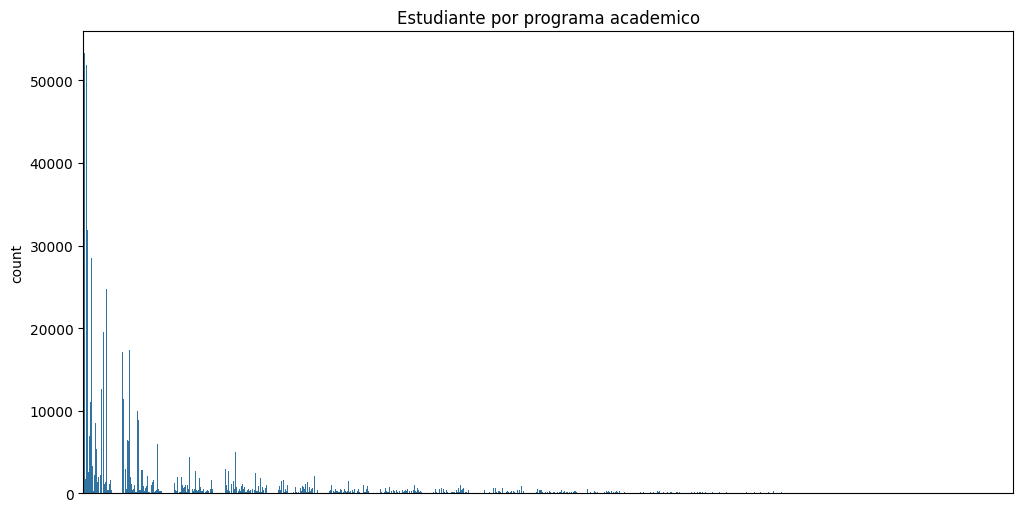

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=train, x="ESTU_PRGM_ACADEMICO")
ax.set_title("Estudiante por programa academico")
ax.set_xlabel(" ")
ax.set_xticks([])
plt.show()

In [ ]:
# Top-50 programas academicos
train["ESTU_PRGM_ACADEMICO"].value_counts().sort_values(ascending=False)[:50]

,count
ESTU_PRGM_ACADEMICO,
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
ADMINISTRACIÓN DE EMPRESAS,24777
INGENIERIA CIVIL,19487
MEDICINA,18099
PSICOLOGÍA,17377


cúanto porcentaje representan estas carreras.

In [ ]:
(train["ESTU_PRGM_ACADEMICO"].value_counts(normalize=True) * 100)[:50]

,proportion
ESTU_PRGM_ACADEMICO,
DERECHO,7.688664
ADMINISTRACION DE EMPRESAS,7.494874
CONTADURIA PUBLICA,5.727653
PSICOLOGIA,4.611119
INGENIERIA INDUSTRIAL,4.112780
ADMINISTRACIÓN DE EMPRESAS,3.577906
INGENIERIA CIVIL,2.814007
MEDICINA,2.613574
PSICOLOGÍA,2.509314


Creemos algunas gráficas de contingencia comparativas con varias columnas contra la variable de interes que es Rendimiento_global.

In [ ]:
# Create contingency tables
periodo_table = pd.crosstab(train.PERIODO, train.RENDIMIENTO_GLOBAL)
estrato_table = pd.crosstab(train.FAMI_ESTRATOVIVIENDA, train.RENDIMIENTO_GLOBAL)
semanatrabaja_table = pd.crosstab(train.ESTU_HORASSEMANATRABAJA, train.RENDIMIENTO_GLOBAL)

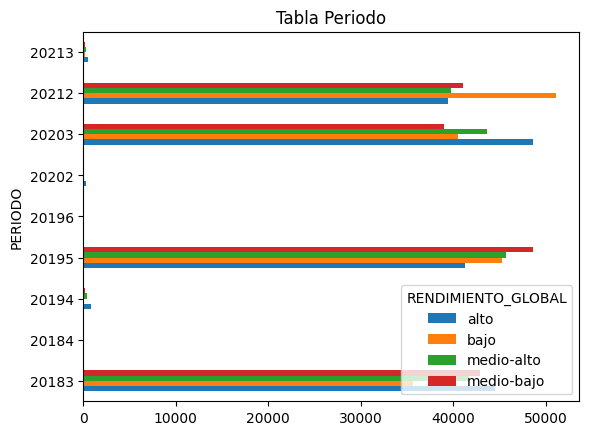

In [ ]:
periodo_table.plot(kind="barh", title="Tabla Periodo")

plt.show()

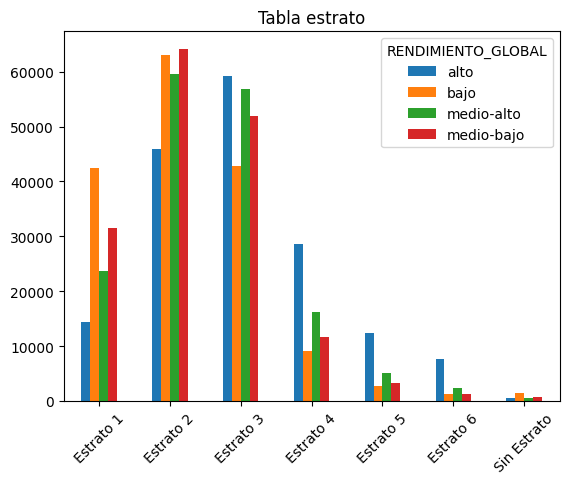

In [ ]:
estrato_table.plot(kind="bar", title="Tabla estrato", xlabel="")
plt.xticks(rotation=45)
plt.show()

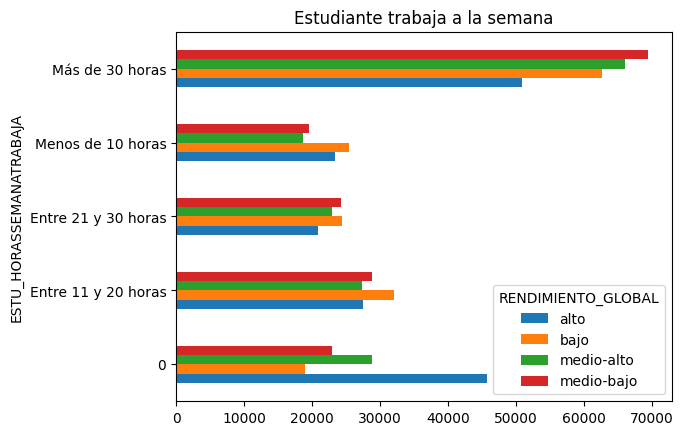

In [ ]:
semanatrabaja_table.plot(kind='barh', title='Estudiante trabaja a la semana')
plt.show()

Creamos una matrix de correlacion para saber cómo se comportan entre sí mis variables.

In [ ]:
!pip install dython

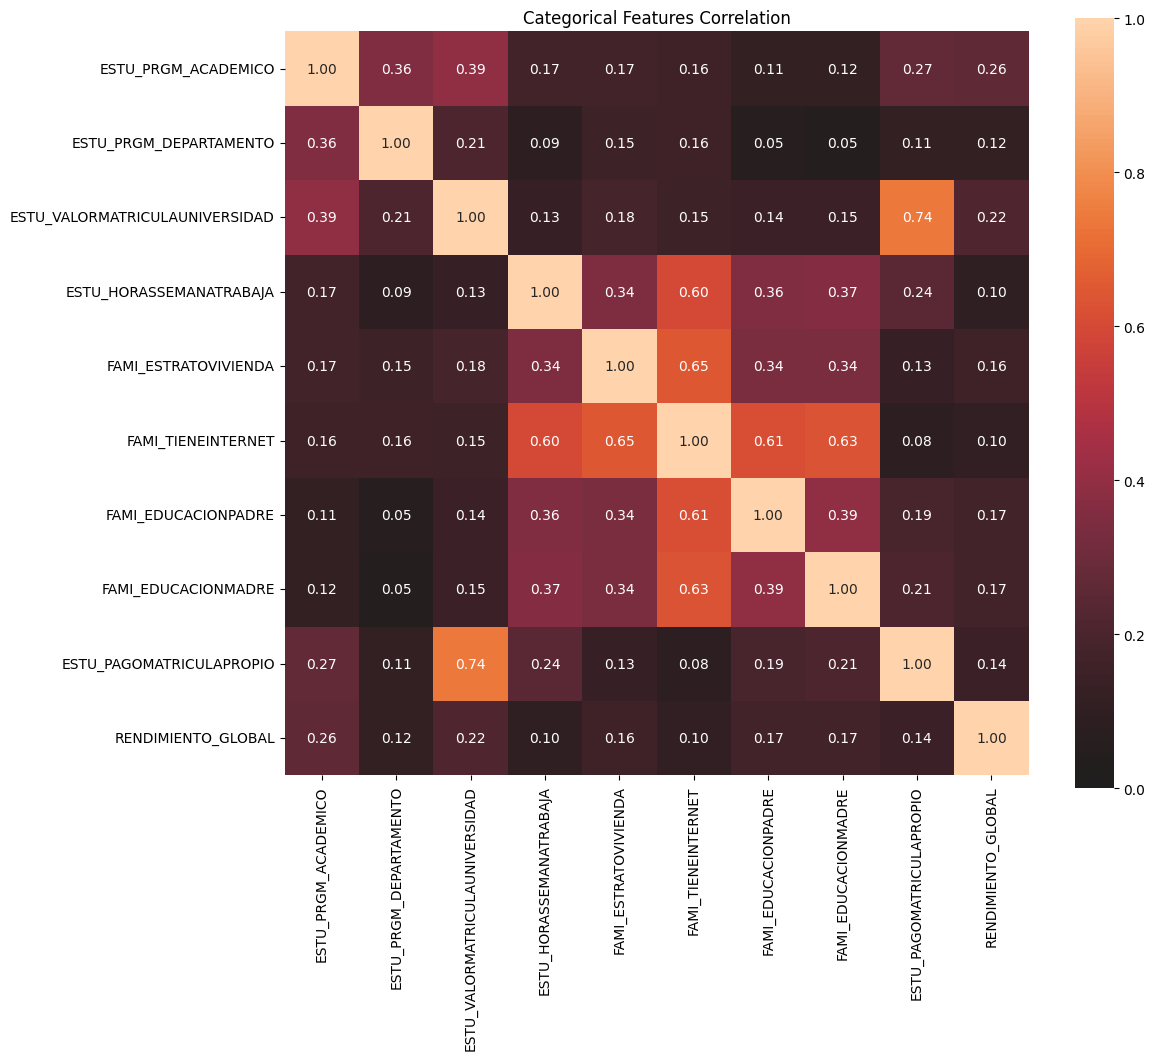

In [ ]:
from dython.nominal import associations
df_categorias = train.select_dtypes('object')
associations(df_categorias, title='Categorical Features Correlation', figsize=(12, 10))
plt.show()

Despues de entender mejor los datos visualmente vamos a proceder hacer el respectivo preprocesado.

*   rellenar de datos. el rellenado de datos faltante que vamos aplicar sera la siguiente, en aquellas columnas donde 'no sabe' sea una opción vamos a rellenar los datos faltantes con esa opción. ó rellenaremos los datos con el dato más frecuente es decir, con la moda. Esto lo hacemos ya que la cantidad de datos faltantes no representan una cantidad considerable teniendo en cuenta que mi dataset tiene aprox 700mil filas.
*   Agrupar y limpiar los datos. Algunas columnas como 'ESTU_PRGM_ACADEMICO' & 'ESTU_PRGM_DEPARTAMENTO'. Tienes muchas posibles valores, y muchos valores tienen el mismo significado, aunque esten escritos de mal, debemos agrupar estos valores, para hacer menos pesado el proceso de one-hot que aplicaremos para estas respectivas columnas.






In [ ]:

mapeo = {'Si': 1, 'S': 1, 'No': 0, 'N':0}
target_columns = ['FAMI_TIENEINTERNET', 'ESTU_PAGOMATRICULAPROPIO']
for column in target_columns:
    train[column] = train[column].map(mapeo)
for col in target_columns:
  train[col] = train[col].fillna(0)
for col in target_columns:
  print(f"{col}: {train[col].isnull().sum()} missing values")

FAMI_TIENEINTERNET: 0 missing values
ESTU_PAGOMATRICULAPROPIO: 0 missing values


In [ ]:
train.isna().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,0
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664


Vamos a tratar el 'FAMI_ESTRATOVIVIENDA' que es una variable categorica que tiene cierto grado de orden

In [ ]:
#Ver los posibles valores de 'FAMI_ESTRATOVIVIENDA' ademas cuantos valores hay de cada tipo

print(train['FAMI_ESTRATOVIVIENDA'].value_counts())


FAMI_ESTRATOVIVIENDA
Estrato 2      232671
Estrato 3      210685
Estrato 1      111991
Estrato 4       65514
Estrato 5       23608
Estrato 6       12605
Sin Estrato      3289
Name: count, dtype: int64


In [ ]:

# Diccionario de mapeo para FAMI_ESTRATOVIVIENDA
mapeo_estrato = {'Sin Estrato': 0, 'Estrato 1': 1, 'Estrato 2': 2, 'Estrato 3': 3, 'Estrato 4': 4, 'Estrato 5': 5, 'Estrato 6': 6}


# Aplicar mapeo a las columnas respectivas
train['FAMI_ESTRATOVIVIENDA'] = train['FAMI_ESTRATOVIVIENDA'].map(mapeo_estrato)

# Verificar los cambios
print(train[['FAMI_ESTRATOVIVIENDA']].head())

   FAMI_ESTRATOVIVIENDA
0                   3.0
1                   3.0
2                   3.0
3                   4.0
4                   3.0


In [ ]:
# codigo para rellenar datos faltantes con la moda de mi columna

# Find the mode of the column
mode_value = train['FAMI_ESTRATOVIVIENDA'].mode()[0]

# Fill missing values with the mode
train['FAMI_ESTRATOVIVIENDA'] = train['FAMI_ESTRATOVIVIENDA'].fillna(mode_value)

# Verify that missing values are filled
print(train['FAMI_ESTRATOVIVIENDA'].isnull().sum())


0


In [ ]:
train.isna().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,0
FAMI_TIENEINTERNET,0
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664


Ahora vamos a normalizar nuestras dos columnas con valores continuos como lo son 'ESTU_VALORMATRICULAUNIVERSIDAD' & 'ESTU_HORASSEMAANATRABAJA'
Despues de ser normalizado de nuevo vamos a rellenarlo con la moda de nuestros datos.

In [ ]:
variables_continuas = ['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA']


In [ ]:

# Definir el mapeo de categorías a valores numéricos para cada columna
mapeo_valores_matricula = {
    'Menos de 500 mil': 0,
    'Entre 500 mil y menos de 1 millón': 1,
    'Entre 1 millón y menos de 2.5 millones': 2,
    'Entre 2.5 millones y menos de 4 millones': 3,
    'Entre 4 millones y menos de 5.5 millones': 4,
    'Entre 5.5 millones y menos de 7 millones': 5,
    'Más de 7 millones': 6,
    'No pagó matrícula': 7
}

mapeo_valores_horas_trabajo = {
    '0': 0,
    'Menos de 10 horas': 1,
    'Entre 11 y 20 horas': 2,
    'Entre 21 y 30 horas': 3,
    'Más de 30 horas': 4
}

# Convertir las columnas a formato numérico utilizando el mapeo
train['ESTU_VALORMATRICULAUNIVERSIDAD'] = train['ESTU_VALORMATRICULAUNIVERSIDAD'].map(mapeo_valores_matricula)
train['ESTU_HORASSEMANATRABAJA'] = train['ESTU_HORASSEMANATRABAJA'].map(mapeo_valores_horas_trabajo)
for col in variables_continuas:
  train[col] = train[col].fillna(0)
# Verificar los cambios
print(train[['ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_HORASSEMANATRABAJA']].head())

   ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA
0                             5.0                      1.0
1                             3.0                      0.0
2                             3.0                      4.0
3                             4.0                      0.0
4                             3.0                      3.0


In [ ]:
print(train['FAMI_ESTRATOVIVIENDA'].value_counts())

FAMI_ESTRATOVIVIENDA
2.0    264808
3.0    210685
1.0    111991
4.0     65514
5.0     23608
6.0     12605
0.0      3289
Name: count, dtype: int64


In [ ]:
train.isna().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,0
ESTU_HORASSEMANATRABAJA,0
FAMI_ESTRATOVIVIENDA,0
FAMI_TIENEINTERNET,0
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664


In [ ]:
print(train['FAMI_EDUCACIONPADRE'].value_counts())


FAMI_EDUCACIONPADRE
Secundaria (Bachillerato) completa      128289
Primaria incompleta                     125675
Educación profesional completa           83117
Secundaria (Bachillerato) incompleta     71654
Técnica o tecnológica completa           62995
Primaria completa                        55958
Postgrado                                44169
Educación profesional incompleta         27084
Técnica o tecnológica incompleta         22552
Ninguno                                  22008
No sabe                                  16592
No Aplica                                 9229
Name: count, dtype: int64


In [ ]:
print(train['FAMI_EDUCACIONMADRE'].value_counts())

FAMI_EDUCACIONMADRE
Secundaria (Bachillerato) completa      141744
Primaria incompleta                      99420
Técnica o tecnológica completa           89542
Educación profesional completa           85326
Secundaria (Bachillerato) incompleta     81012
Primaria completa                        56125
Postgrado                                46246
Técnica o tecnológica incompleta         27533
Educación profesional incompleta         22470
Ninguno                                  14483
No sabe                                   3017
No Aplica                                 1918
Name: count, dtype: int64


In [ ]:
# Calcula la moda para las columnas seleccionadas
moda_padre = train['FAMI_EDUCACIONPADRE'].mode()[0]
moda_madre = train['FAMI_EDUCACIONMADRE'].mode()[0]

# Rellena los valores faltantes con la moda
train['FAMI_EDUCACIONPADRE'] = train['FAMI_EDUCACIONPADRE'].fillna(moda_padre)
train['FAMI_EDUCACIONMADRE'] = train['FAMI_EDUCACIONMADRE'].fillna(moda_madre)

# Verifica que ya no haya datos faltantes
print(train.isnull().sum())

ID                                0
PERIODO                           0
ESTU_PRGM_ACADEMICO               0
ESTU_PRGM_DEPARTAMENTO            0
ESTU_VALORMATRICULAUNIVERSIDAD    0
ESTU_HORASSEMANATRABAJA           0
FAMI_ESTRATOVIVIENDA              0
FAMI_TIENEINTERNET                0
FAMI_EDUCACIONPADRE               0
FAMI_EDUCACIONMADRE               0
ESTU_PAGOMATRICULAPROPIO          0
RENDIMIENTO_GLOBAL                0
dtype: int64


In [ ]:
train = pd.get_dummies(train, columns=[ 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE'], prefix=['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE'])
train.replace({True: 1, False: 0})

<ipython-input-135-47d360d7e7f2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.replace({True: 1, False: 0})


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,...,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta
0,904256,20212,ENFERMERIA,BOGOTÁ,5.0,1.0,3.0,1.0,0.0,medio-alto,...,0,0,0,1,0,0,0,0,0,0
1,645256,20212,DERECHO,ATLANTICO,3.0,0.0,3.0,0.0,0.0,bajo,...,0,0,0,0,0,0,0,0,0,1
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,3.0,4.0,3.0,1.0,0.0,bajo,...,0,0,0,0,0,0,1,0,0,0
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.0,0.0,4.0,1.0,0.0,alto,...,0,0,0,0,0,0,1,0,0,0
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.0,3.0,3.0,1.0,0.0,medio-bajo,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,1.0,2.0,2.0,1.0,1.0,medio-alto,...,0,0,0,0,0,0,0,1,0,0
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,3.0,4.0,3.0,1.0,0.0,bajo,...,0,0,0,0,0,0,0,1,0,0
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,2.0,1.0,3.0,1.0,1.0,medio-bajo,...,0,0,0,0,0,0,0,1,0,0
692498,986620,20195,PSICOLOGIA,TOLIMA,3.0,1.0,1.0,0.0,1.0,bajo,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
print(train['RENDIMIENTO_GLOBAL'].value_counts())

RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64


In [ ]:
# Diccionario de mapeo para RENDIMIENTO_GLOBAL
mapeo_rendimiento = {'bajo': 0, 'medio-bajo': 1, 'medio-alto': 2, 'alto': 3}

# Aplicar mapeo a las columnas respectivas
train['RENDIMIENTO_GLOBAL'] = train['RENDIMIENTO_GLOBAL'].map(mapeo_rendimiento)

# Verificar los cambios
print(train[['RENDIMIENTO_GLOBAL']].head())

   RENDIMIENTO_GLOBAL
0                   2
1                   0
2                   0
3                   3
4                   1


In [ ]:
train.head(10)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,...,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta
0,904256,20212,ENFERMERIA,BOGOTÁ,5.0,1.0,3.0,1.0,0.0,2,...,False,False,False,True,False,False,False,False,False,False
1,645256,20212,DERECHO,ATLANTICO,3.0,0.0,3.0,0.0,0.0,0,...,False,False,False,False,False,False,False,False,False,True
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,3.0,4.0,3.0,1.0,0.0,0,...,False,False,False,False,False,False,True,False,False,False
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.0,0.0,4.0,1.0,0.0,3,...,False,False,False,False,False,False,True,False,False,False
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.0,3.0,3.0,1.0,0.0,1,...,False,False,False,False,True,False,False,False,False,False
5,659872,20203,MEDICINA VETERINARIA,ANTIOQUIA,6.0,1.0,5.0,1.0,0.0,2,...,False,False,False,False,False,False,True,False,False,False
6,47159,20183,INGENIERIA MECANICA,HUILA,3.0,3.0,2.0,1.0,1.0,3,...,False,False,False,False,False,False,False,False,True,False
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,2.0,2.0,2.0,1.0,1.0,1,...,False,False,False,False,False,False,False,True,False,False
8,257869,20212,INGENIERIA INDUSTRIAL,ATLANTICO,5.0,1.0,1.0,1.0,1.0,1,...,False,False,False,False,False,False,False,False,False,False
9,465511,20183,ADMINISTRACION DE EMPRESAS,ANTIOQUIA,3.0,4.0,5.0,1.0,1.0,3,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 34 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   ID                                                        692500 non-null  int64  
 1   PERIODO                                                   692500 non-null  int64  
 2   ESTU_PRGM_ACADEMICO                                       692500 non-null  object 
 3   ESTU_PRGM_DEPARTAMENTO                                    692500 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD                            692500 non-null  float64
 5   ESTU_HORASSEMANATRABAJA                                   692500 non-null  float64
 6   FAMI_ESTRATOVIVIENDA                                      692500 non-null  float64
 7   FAMI_TIENEINTERNET                                        692500 non-null  float64
 8   ESTU

# Consideraciones.

Aun hace falta una parte fundamental y es agrupar y darle tratado a las columnas.
<br/>
ESTU_PRGM_ACADEMICO  & ESTU_PRGM_DEPARTAMENTO
<br/>
Se buscara reducir al maximo la cantidad de valores posibles que presenten estas columnas, es decir, vamos agrupar los valores y que queden los menores posibles, pero esa consideración la tendremos en la proxima entrega. Por el momento dejamos claros los conceptos de visualización e interpretación de los datos, ademas de diferentes alternativas para imputar o rellenar datos.